## Color Variations that could be useful

Sources for use and resolving of issues
- https://pillow.readthedocs.io/en/stable/handbook/overview.html
- https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/
- https://stackoverflow.com/questions/41265576/plt-imshow-shows-color-images-for-grayscale-images-in-ipython
- https://arxiv.org/ftp/arxiv/papers/1807/1807.09232.pdf
- https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/
- https://stackoverflow.com/questions/40437181/how-to-remove-the-local-average-color-from-an-image-with-opencv

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
import cv2
import os

plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')

In [9]:
df = pd.read_csv(r'D:\data\Projects\notebooks\RetinaAI\Multiclass\train4_small.csv')
df.head()

,filename,labels
0,3f58d128caf6.jpg,glaucoma
1,802b4bfabd52.jpg,md
2,7bcfab1fa2da.jpg,opacity
3,012e91949ec4.jpg,opacity
4,6386346fb595.jpg,opacity


#### Look at some of the preprocessed images

In [26]:
def imag(im_dir):

    plt.figure(figsize=(10, 10))
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        rand = df.sample(n=1).iloc[0,0]
        abn = (df[df['filename']== rand].iloc[0,1])
        img = plt.imread(os.path.join(im_dir, rand))
        plt.axis('off')
        plt.title(abn)
        plt.imshow(img) #, cmap='gray'
    plt.tight_layout()

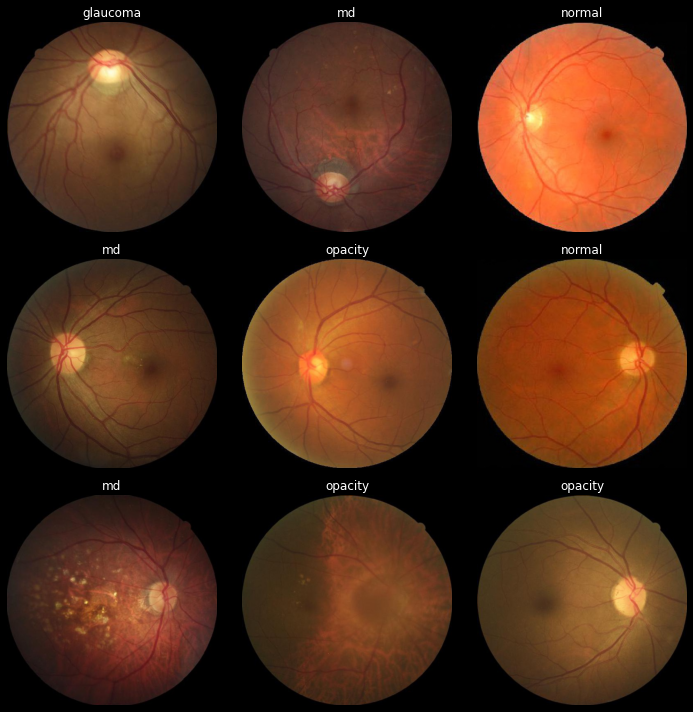

In [27]:
imag(r"D:\data\Projects\notebooks\RetinaAI\Multiclass\four")

#### Grayscale

In [19]:
img = Image.open(r'D:\data\Projects\notebooks\RetinaAI\Preprocessing\test\\00a1cd744652.jpg')
img.convert('L').save(r'D:\data\Projects\notebooks\RetinaAI\Preprocessing\test\\t00a1cd744652.jpg')

#### Enhance contrast by 30 %

In [23]:
from PIL import ImageEnhance
im = Image.open(r'D:\data\Projects\notebooks\RetinaAI\Preprocessing\test\\00a1cd744652.jpg')
enh = ImageEnhance.Contrast(im)
enh.enhance(1.3).save(r'D:\data\Projects\notebooks\RetinaAI\Preprocessing\test\\cont_00a1cd744652.jpg')

In [24]:
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)

In [25]:
im.save(r'D:\data\Projects\notebooks\RetinaAI\Preprocessing\test\\ww_00a1cd744652.jpg')

In [ ]:
# Filter
from PIL import ImageFilter
out = im.filter(ImageFilter.DETAIL)
out.save(r'D:\data\Projects\notebooks\RetinaAI\Preprocessing\test\\f_00a1cd744652.jpg')

In [ ]:
# multiply each pixel by 1.2
out = im.point(lambda i: i * 1.2)
out.save(r'D:\data\Projects\notebooks\RetinaAI\Preprocessing\test\\mm_00a1cd744652.jpg')

In [ ]:
enh = ImageEnhance.Contrast(im)
ima = enh.enhance(1.3).convert('L')
ima.save(r'D:\data\Projects\notebooks\RetinaAI\Preprocessing\test\\cont_00a1cd744652.jpg')

In [ ]:
# Normalize
image = Image.open(r'D:\data\Projects\notebooks\RetinaAI\Preprocessing\test\\00a1cd744652.jpg')
pixels = asarray(image).astype('float32')
pixels /= 255.0
pixels.min(), pixels.max(), pixels.mean()

#### Color Variant 3

In [3]:
df = pd.read_csv(r'D:\data\Projects\notebooks\RetinaAI\Multiclass\train_four.csv')

In [4]:
df.head()

,filename,labels
0,3f58d128caf6.jpg,glaucoma
1,802b4bfabd52.jpg,macular degeneration
2,7bcfab1fa2da.jpg,opacity
3,012e91949ec4.jpg,opacity
4,6386346fb595.jpg,opacity


In [6]:
for i in df.filename:
    image = cv2.imread(r'D:\data\Projects\notebooks\RetinaAI\Multiclass\four_var3\\'+i)
    blur = cv2.blur(image, ksize=(15, 15))
    dst = cv2.addWeighted(image, 4, blur, -4, 128)
    cv2.imwrite(os.path.join(r'D:\data\Projects\notebooks\RetinaAI\Multiclass\four_var3\\'+i), dst)

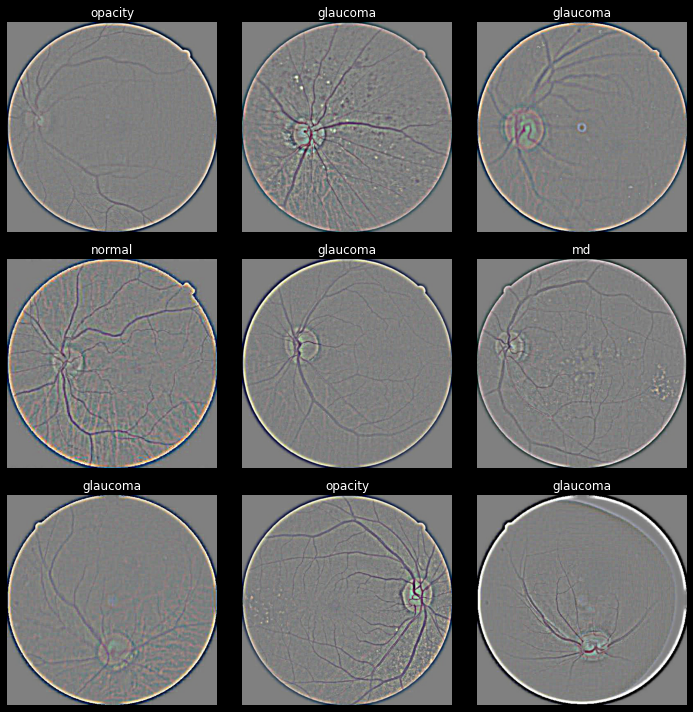

In [28]:
imag(r'D:\data\Projects\notebooks\RetinaAI\Multiclass\four_var3')

#### Image as HSV (can be used for segmentation)
https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html

In [ ]:
from skimage import io
from skimage import data
from skimage.color import rgb2hsv

In [ ]:
rgb_img = io.imread(r'D:\data\Projects\notebooks\RetinaAI\train\00a1cd744652.jpg')

In [ ]:
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 8))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img, cmap='gray')
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

In [ ]:
### Bild als HSV anzeigen - kann für Segmentation genutzt werden
https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html

from skimage import io
from skimage import data
from skimage.color import rgb2hsv

rgb_img = io.imread(r'D:\data\Projects\notebooks\RetinaAI\train\00a1cd744652.jpg')

hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 8))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img, cmap='gray')
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

#### Pixel Intensity

The dimensions of the image are 512 pixels width and 512 pixels height
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 127.9789 and the standard deviation is 22.3566


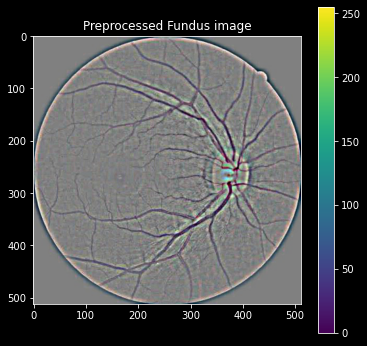

In [41]:
img_gray = r"D:\data\Projects\notebooks\RetinaAI\Multiclass\four_var3\\"

plt.figure(figsize=(6, 6))
sample_img = "0a1ca36be2c5.jpg"
#df.filename[0]
imag = plt.imread(os.path.join(img_gray, sample_img))
plt.imshow(imag)
plt.colorbar()
plt.title('Preprocessed Fundus image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

#### Color Histogram

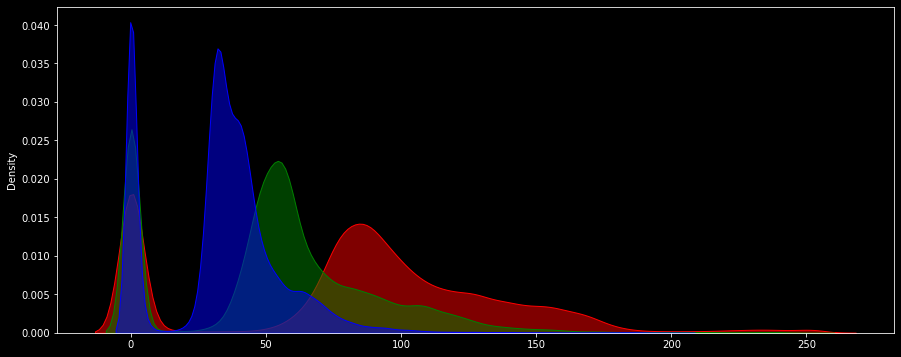

In [42]:
image = plt.imread(r"D:\data\Projects\notebooks\RetinaAI\Multiclass\four\0a1ca36be2c5.jpg")
plt.figure(figsize=(15, 6))
sns.kdeplot(image[:, :, 0].ravel(), color = 'red', shade = True, alpha = 0.5);
sns.kdeplot(image[:, :, 1].ravel(), color = 'green', shade = True, alpha = 0.5);
sns.kdeplot(image[:, :, 2].ravel(), color = 'blue', shade = True, alpha = 0.5);